### Go through all candor files

In [42]:
import os
import pandas as pd
import numpy as np
from tqdm import notebook
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
rootdir = '../candor'
print(rootdir)

../candor


In [3]:
transcript = []
for subdir, dirs, files in notebook.tqdm(os.walk(rootdir)):
    for file in files:
        if file=="transcript_backbiter.csv":
            current_csv = pd.read_csv(os.path.join(subdir, file))
            transcript.append(current_csv)

0it [00:00, ?it/s]

In [5]:
transcript[1]["backchannel_count"]

0      1
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    9
198    0
199    1
Name: backchannel_count, Length: 200, dtype: int64

## filter speaker1 vs speaker2

In [6]:
speaker1, speaker2 = transcript[1]["speaker"].unique()

In [7]:
speaker1, speaker2

('5f220462c16ecb68c97ccad9', '55a43cf3fdf99b02ff6cb0b4')

In [11]:
transcript[1]["backchannel_count"][transcript[1]["speaker"]==speaker1].sum()

67

In [10]:
transcript[1]["backchannel_count"][transcript[1]["speaker"]==speaker2].sum()

133

In [16]:
speaker1_backchannel = []
speaker2_backchannel = []

for trans in notebook.tqdm(transcript):
    speaker1, speaker2 = trans["speaker"].unique()
    speaker1_backchannel.append(trans["backchannel_count"][trans["speaker"]==speaker1].sum())
    speaker2_backchannel.append(trans["backchannel_count"][trans["speaker"]==speaker2].sum())

  0%|          | 0/1656 [00:00<?, ?it/s]

In [17]:
print(speaker1_backchannel, speaker2_backchannel)

[212, 67, 84, 194, 53, 97, 71, 53, 171, 39, 165, 53, 236, 227, 93, 121, 106, 86, 105, 163, 194, 258, 218, 107, 220, 250, 142, 107, 214, 301, 131, 240, 94, 139, 116, 37, 115, 57, 46, 159, 102, 382, 139, 84, 19, 47, 66, 118, 97, 59, 102, 66, 101, 127, 122, 110, 30, 241, 138, 158, 33, 110, 123, 104, 180, 130, 66, 438, 109, 119, 221, 194, 83, 98, 91, 66, 170, 250, 100, 56, 48, 153, 189, 287, 137, 165, 82, 155, 123, 164, 132, 72, 222, 211, 131, 98, 105, 89, 189, 77, 274, 77, 551, 47, 58, 117, 52, 230, 61, 219, 178, 126, 214, 185, 188, 117, 144, 108, 60, 256, 86, 129, 296, 138, 109, 148, 193, 61, 111, 125, 104, 76, 116, 63, 138, 99, 186, 146, 335, 98, 127, 87, 82, 97, 144, 169, 75, 92, 420, 129, 168, 127, 141, 129, 93, 53, 274, 178, 54, 170, 51, 152, 217, 232, 89, 304, 46, 153, 141, 277, 193, 269, 48, 184, 251, 91, 83, 142, 28, 234, 138, 174, 127, 127, 79, 176, 343, 35, 243, 139, 63, 158, 65, 117, 90, 57, 30, 140, 89, 379, 108, 113, 121, 118, 83, 145, 109, 96, 209, 277, 89, 271, 200, 260, 19

In [18]:
survey_list = []
for subdir, dirs, files in notebook.tqdm(os.walk(rootdir)):
    for file in files:
        if file=="survey.csv":
            current_csv = pd.read_csv(os.path.join(subdir, file))
            survey_list.append(current_csv)

0it [00:00, ?it/s]

In [105]:
preaffect_list = []
affect_list = []
prearousal_list = []
arousal_list = []
speaker1_backchannel = []
speaker2_backchannel = []

for i, survey in enumerate(notebook.tqdm(survey_list)):
    # if ((np.mean(survey["conversationalist"]) >= 85) or (np.mean(survey["conversationalist"]) <= 65.5)):
    if ((np.mean(survey['conversationalist']) >= 85)):
        speaker1, speaker2 = survey["user_id"].unique()
        speaker1_backchannel.append(transcript[i]["backchannel_count"][transcript[i]["speaker"]==speaker1].sum())
        speaker2_backchannel.append(transcript[i]["backchannel_count"][transcript[i]["speaker"]==speaker2].sum())

        preaffect_list.append(survey["pre_affect"])
        affect_list.append(survey["affect"])
        prearousal_list.append(survey["pre_arousal"])
        arousal_list.append(survey["arousal"])

  0%|          | 0/1656 [00:00<?, ?it/s]

In [106]:
idx_notnan = np.where(~np.isnan(np.mean(affect_list, axis=1))==True)[0]
idx_notnan.shape

(415,)

In [66]:
np.where(np.isnan(np.mean(affect_list, axis=1))==True)

(array([ 60,  61,  64, 102, 114, 124, 147, 173, 233, 238, 242, 272, 325,
        353, 398, 400, 448, 510, 520, 525, 556, 593, 594, 613, 651, 670,
        743, 773, 777, 823]),)

In [64]:
np.hstack(affect_list).shape

(1708,)

In [32]:
speaker2_backchannel[0], preaffect_list[0], affect_list[0]

(84,
 0    7.0
 1    8.0
 Name: pre_affect, dtype: float64,
 0    7.0
 1    9.0
 Name: affect, dtype: float64)

In [30]:
speaker1_backchannel[0], preaffect_list[0], affect_list[0]

(116,
 0    7.0
 1    8.0
 Name: pre_affect, dtype: float64,
 0    7.0
 1    9.0
 Name: affect, dtype: float64)

In [34]:
speaker1_backchannel[1], speaker2_backchannel[1], preaffect_list[1], affect_list[1]

(194,
 81,
 0    5.0
 1    4.0
 Name: pre_affect, dtype: float64,
 0    6.0
 1    6.0
 Name: affect, dtype: float64)

In [62]:
idx_notnan

array([   0,    1,    2, ..., 1705, 1706, 1707])

In [117]:
from scipy.stats import zscore
x = zscore(np.hstack([speaker2_backchannel[i] for i in idx_notnan]).reshape(-1, 1))
y = np.hstack([affect_list[i][0]-preaffect_list[i][0] for i in idx_notnan])
x.shape, y.shape

((415, 1), (415,))

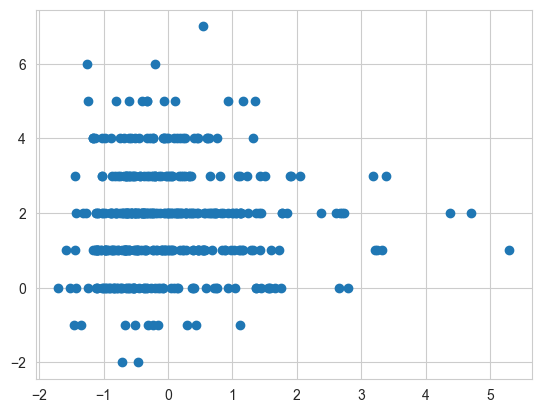

In [118]:
plt.scatter(x, y)

In [119]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [120]:
rsqr = lm.score(x, y)

In [121]:
print(rsqr)

0.0011279557211522073


In [28]:
survey_list[0]["user_id"]

0    5c8be0dd542fbd0016924f5f
1    5f2f6bd965964e35e20c7445
Name: user_id, dtype: object

In [23]:
transcript[0]["speaker"].unique()

array(['5f2f6bd965964e35e20c7445', '5c8be0dd542fbd0016924f5f'],
      dtype=object)

In [24]:
survey_list[10]["user_id"], transcript[10]["speaker"].unique()

(0    5eaf77532b6845665ddefd09
 1    5eaf89868dc798686228174b
 Name: user_id, dtype: object,
 array(['5eaf77532b6845665ddefd09', '5eaf89868dc798686228174b'],
       dtype=object))

In [25]:
survey_list[5]["user_id"], transcript[5]["speaker"].unique()

(0    5987c9f26ab9880001b5b04d
 1    5f1f2cf5a441a30fa1b79b2d
 Name: user_id, dtype: object,
 array(['5987c9f26ab9880001b5b04d', '5f1f2cf5a441a30fa1b79b2d'],
       dtype=object))

no linear relationship between the backchannel count and receiver affect/ arousal change